<a href="https://colab.research.google.com/github/sunidhib2002/Company-Analysis/blob/main/Fytlyff_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/content/Fytlyff_DS_Interview.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


In [5]:
# to list unique places or cities 
data[data['Level 1'].isnull() == False]['Place_in_India'].unique()

array(['Pune', 'Bengaluru', 'Hyderabad', 'Dehradun', 'Indore'],
      dtype=object)

In [6]:
data.dtypes

Year                    int64
Month                  object
Laptop/Desktop         object
Type_of_Customers?     object
Coming from            object
Place_in_India         object
Level 1               float64
Level 2               float64
Level 3                 int64
Level 4                 int64
dtype: object

In [7]:
col = list(data.columns)
col

['Year',
 'Month',
 'Laptop/Desktop',
 'Type_of_Customers?',
 'Coming from',
 'Place_in_India',
 'Level 1',
 'Level 2',
 'Level 3',
 'Level 4']

In [8]:
# to see if there are any missing values
for x in col: 
  print(x, data[x].isnull().sum())

Year 0
Month 0
Laptop/Desktop 0
Type_of_Customers? 0
Coming from 0
Place_in_India 0
Level 1 1079
Level 2 1079
Level 3 0
Level 4 0


In [9]:
data['Level 1']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2155     67299.0
2156    430294.0
2157     48713.0
2158    593021.0
2159    372897.0
Name: Level 1, Length: 2160, dtype: float64

In [10]:
data['Type_of_Customers?'].value_counts()

Existing_Customer    1080
New_Customer         1080
Name: Type_of_Customers?, dtype: int64

In [11]:
data['Coming from'].value_counts()

Came_From_LinkedIn      720
Landed_Directly         720
Unidentified_Sources    720
Name: Coming from, dtype: int64

In [12]:
data['Laptop/Desktop'].value_counts()

Desktop_Website    1080
Laptop_Website     1080
Name: Laptop/Desktop, dtype: int64

In [13]:
data.head(2)

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916


In [14]:
# to find new customers from Pune who accessed the website through LinkedIn
data[(data['Place_in_India'] == 'Pune') & (data['Type_of_Customers?'] == 'New_Customer') & (data['Coming from'] == 'Came_From_LinkedIn')]

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
19,2020,Jan,Desktop_Website,New_Customer,Came_From_LinkedIn,Pune,383260.0,305902.0,172827,122285
49,2020,Jan,Laptop_Website,New_Customer,Came_From_LinkedIn,Pune,480675.0,347596.0,186713,135275
79,2020,Feb,Desktop_Website,New_Customer,Came_From_LinkedIn,Pune,321335.0,254082.0,134654,92966
109,2020,Feb,Laptop_Website,New_Customer,Came_From_LinkedIn,Pune,426286.0,304066.0,156062,108686
139,2020,Mar,Desktop_Website,New_Customer,Came_From_LinkedIn,Pune,316436.0,248729.0,129296,89311
...,...,...,...,...,...,...,...,...,...,...
2029,2022,Oct,Laptop_Website,New_Customer,Came_From_LinkedIn,Pune,472184.0,243803.0,97067,62583
2059,2022,Nov,Desktop_Website,New_Customer,Came_From_LinkedIn,Pune,361255.0,189930.0,93589,64608
2089,2022,Nov,Laptop_Website,New_Customer,Came_From_LinkedIn,Pune,651079.0,366626.0,185650,110735
2119,2022,Dec,Desktop_Website,New_Customer,Came_From_LinkedIn,Pune,324090.0,168545.0,83423,56517


In [15]:
# part - 1

In [16]:
months = {'Jan' : 'January', 'Feb': 'February', 'Mar' : 'March', 'Apr' : 'April', 'May' : 'May', 'Jun' : 'June', 'Jul' : 'July', 'Aug' : 'August', 'Sep' : 'September', 'Oct' : 'October', 'Nov' : 'November', 'Dec' : 'December'}
months

{'Jan': 'January',
 'Feb': 'February',
 'Mar': 'March',
 'Apr': 'April',
 'May': 'May',
 'Jun': 'June',
 'Jul': 'July',
 'Aug': 'August',
 'Sep': 'September',
 'Oct': 'October',
 'Nov': 'November',
 'Dec': 'December'}

In [17]:
def data_cleaning():
  data['Level 1'].fillna(np.mean(data['Level 1']), inplace = True)
  data['inc/dec percentage'] = (abs(data['Level 1'] - data['Level 4']) / data['Level 1']) * 100
  data['Level 2'].fillna(np.mean(data['Level 2']), inplace = True)
  data['Coming from'] = data['Coming from'].replace({'Came_From_LinkedIn': 'From_LinkedIn', 'Landed_Directly' : 'Direct_traffic'})
  data['Month'] = data['Month'].apply(lambda x : months[x])

In [18]:
# data['How/_many_Landed_on_the_our_Page_and_clicked_on_a_button?'].fillna(np.mean(data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button']))

In [19]:
# handling the missing values, changing the month Jan to January and so on.
data_cleaning()

In [20]:
data.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
1,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850
2,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319
3,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974
4,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472


In [21]:
data['Month'].value_counts()

January      180
February     180
March        180
April        180
May          180
June         180
July         180
August       180
September    180
October      180
November     180
December     180
Name: Month, dtype: int64

In [22]:
data['Coming from'].value_counts()

From_LinkedIn           720
Direct_traffic          720
Unidentified_Sources    720
Name: Coming from, dtype: int64

In [23]:
data.isnull().sum()

Year                  0
Month                 0
Laptop/Desktop        0
Type_of_Customers?    0
Coming from           0
Place_in_India        0
Level 1               0
Level 2               0
Level 3               0
Level 4               0
inc/dec percentage    0
dtype: int64

In [24]:
# part - 2

In [25]:
data['Coming from'].value_counts()

From_LinkedIn           720
Direct_traffic          720
Unidentified_Sources    720
Name: Coming from, dtype: int64

In [26]:
data['Type_of_Customers?'].value_counts()

Existing_Customer    1080
New_Customer         1080
Name: Type_of_Customers?, dtype: int64

In [27]:
data['Laptop/Desktop'].value_counts()

Desktop_Website    1080
Laptop_Website     1080
Name: Laptop/Desktop, dtype: int64

In [28]:
def descriptive_stats(Year = 2020, Month = 'January', Laptop_Desktop = 'Desktop_Website', Type_of_Customers = 'Existing_Customer', Coming_From = 'From_LinkedIn'):
  print('Level 1', np.min(data['Level 1']))
  print('Level 2', np.min(data['Level 2']))
  print('Level 3', np.min(data['Level 3']))
  print('Level 4', np.min(data['Level 4']))
  print() 

  d = data[(data['Laptop/Desktop'] == 'Desktop_Website') & (data['Coming from'] == 'Direct_traffic')]
  print('max value of (Level 2 / Level 1)', np.max(d["Level 2"] / d["Level 1"]))
  print()

  df = data[(data['Year'] == Year) & (data['Month'] == Month) & (data['Laptop/Desktop'] == Laptop_Desktop) & (data['Type_of_Customers?'] == Type_of_Customers) & (data['Coming from'] == Coming_From)]
  
  print(df.shape)
  
  print(df.describe())
  print()
  col = list(df.columns)
  category = []
  for x in col:
    if data[x].dtype == 'object':
      category.append(x)

  for x in category:
    print(x,df[x].unique(), df[x].dtype)
    print()
  

In [29]:
# df = data[(data['Year'] == 2020) & (data['Month'] == 'January') & (data['Laptop/Desktop'] == 'Desktop_Website') & (data['Type_of_Customers?'] == 'Existing_Customer') & (data['Coming from'] == 'From_LinkedIn')]

In [30]:
# df

In [31]:
descriptive_stats()

Level 1 24567.0
Level 2 8425.0
Level 3 3761
Level 4 766

max value of (Level 2 / Level 1) 0.7938173377045838

(5, 11)
         Year        Level 1        Level 2       Level 3        Level 4  \
count     5.0       5.000000       5.000000       5.00000       5.000000   
mean   2020.0  783870.222017  358215.416281  139154.60000   41051.000000   
std       0.0       0.000000       0.000000  125526.26456   41097.762208   
min    2020.0  783870.222017  358215.416281   41460.00000   11916.000000   
25%    2020.0  783870.222017  358215.416281   55561.00000   17178.000000   
50%    2020.0  783870.222017  358215.416281   56892.00000   19461.000000   
75%    2020.0  783870.222017  358215.416281  220937.00000   46033.000000   
max    2020.0  783870.222017  358215.416281  320923.00000  110667.000000   

       inc/dec percentage  
count            5.000000  
mean            94.763036  
std              5.242929  
min             85.881974  
25%             94.127472  
50%             97.517319  
7

In [32]:
# Part - 3

In [33]:
data_2020 = data[data['Year'] == 2020]

In [34]:
data_2020.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
1,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850
2,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319
3,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974
4,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472


In [35]:
df_2020 = data_2020.groupby('Place_in_India')['Level 4'].sum().reset_index()

In [36]:
df_2020.sort_values(by = 'Level 4', ascending = False, inplace = True)
df_2020['Rank'] = df_2020['Level 4'].rank(ascending = False).astype(int)

In [37]:
df_2020

,Place_in_India,Level 4,Rank
3,Indore,20092071,1
4,Pune,11039977,2
2,Hyderabad,5156066,3
1,Dehradun,3685750,4
0,Bengaluru,3231524,5


In [38]:
df_2020 = df_2020.head(3)

In [39]:
df_2020['Year'] = 2020
df_2020

<ipython-input-39-472235044f5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Year'] = 2020


,Place_in_India,Level 4,Rank,Year
3,Indore,20092071,1,2020
4,Pune,11039977,2,2020
2,Hyderabad,5156066,3,2020


In [40]:
data_2022 = data[data['Year'] == 2022]
df_2022 = data_2022.groupby('Place_in_India')['Level 4'].sum().reset_index()
df_2022.sort_values(by = 'Level 4', ascending = False, inplace = True)
df_2022['Rank'] = df_2022['Level 4'].rank(ascending = False).astype(int)
df_2022 = df_2022.head(3)
df_2022['Year'] = 2022
df_2022

,Place_in_India,Level 4,Rank,Year
3,Indore,15104408,1,2022
4,Pune,11208722,2,2022
2,Hyderabad,8211936,3,2022


In [41]:
df_combined = pd.concat([df_2020, df_2022])

In [42]:
df_combined = df_combined.reset_index()

In [43]:
df_combined.rename(columns = {'Rank':'Rank by column "Level 4"', 'Level 4': 'Sum of Level 4'}, inplace = True)

In [44]:
# top 3 cities in year 2020 and 2022 by Level 4 values
df_combined

,index,Place_in_India,Sum of Level 4,"Rank by column ""Level 4""",Year
0,3,Indore,20092071,1,2020
1,4,Pune,11039977,2,2020
2,2,Hyderabad,5156066,3,2020
3,3,Indore,15104408,1,2022
4,4,Pune,11208722,2,2022
5,2,Hyderabad,8211936,3,2022


In [45]:
# ques 2

In [46]:
df_city = data[(data['Year'] == 2020) | (data['Year'] == 2021) | (data['Year'] == 2022)]

In [47]:
df_city.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
1,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850
2,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319
3,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974
4,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472


In [48]:
df_city_2 = df_city.groupby(['Year', 'Place_in_India'])['Level 1', 'Level 2', 'Level 3', 'Level 4'].sum().reset_index()

<ipython-input-48-5a922484973b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_city_2 = df_city.groupby(['Year', 'Place_in_India'])['Level 1', 'Level 2', 'Level 3', 'Level 4'].sum().reset_index()


In [49]:
df_city_2.head()

,Year,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Bengaluru,6.974099e+07,3.403908e+07,7622409,3231524
1,2020,Dehradun,7.505743e+07,3.626689e+07,7649110,3685750
2,2020,Hyderabad,7.834567e+07,3.930626e+07,10672227,5156066
3,2020,Indore,1.316225e+08,7.702644e+07,42369181,20092071
4,2020,Pune,1.145010e+08,5.750787e+07,30520218,11039977


In [50]:
df_city_2['sum of Level 2 / sum of Level 1'] = df_city_2['Level 2'] / df_city_2['Level 1']
df_city_2['sum of Level 3 / sum of Level 1'] = df_city_2['Level 3'] / df_city_2['Level 1']
df_city_2['sum of Level 4 / sum of Level 1'] = df_city_2['Level 4'] / df_city_2['Level 1']

In [51]:
df_city_2[['Year', 'Place_in_India', 'sum of Level 2 / sum of Level 1', 'sum of Level 3 / sum of Level 1','sum of Level 4 / sum of Level 1']]

,Year,Place_in_India,sum of Level 2 / sum of Level 1,sum of Level 3 / sum of Level 1,sum of Level 4 / sum of Level 1
0,2020,Bengaluru,0.488079,0.109296,0.046336
1,2020,Dehradun,0.483189,0.101910,0.049106
2,2020,Hyderabad,0.501703,0.136220,0.065812
3,2020,Indore,0.585207,0.321899,0.152649
4,2020,Pune,0.502248,0.266550,0.096418
5,2021,Bengaluru,0.453393,0.090450,0.042744
6,2021,Dehradun,0.436285,0.081112,0.031764
7,2021,Hyderabad,0.439948,0.148135,0.074894
8,2021,Indore,0.461700,0.258978,0.115071
9,2021,Pune,0.363878,0.164717,0.069406


In [52]:
df_2 = data[data['Year'] == 2021]
df_2_1 = df_2.groupby('Place_in_India')['Level 4'].sum().reset_index()
df_2_2 = df_2.groupby('Place_in_India')['Level 1'].sum().reset_index()
df_3 = df_2_1.merge(df_2_2, on = 'Place_in_India', how = 'outer')
df_3['ratio'] = df_2_1['Level 4'] / df_2_2['Level 1']
df_3.sort_values(by ='ratio', inplace = True)
df_3.head(3)

,Place_in_India,Level 4,Level 1,ratio
1,Dehradun,2445091,7.697687e+07,0.031764
0,Bengaluru,3140030,7.346057e+07,0.042744
4,Pune,12805835,1.845058e+08,0.069406


In [53]:
df_4 = data[data['Year'] == 2022]
df_4_1 = df_4.groupby('Place_in_India')['Level 4'].sum().reset_index()
df_4_2 = df_4.groupby('Place_in_India')['Level 1'].sum().reset_index()
df_5 = df_4_1.merge(df_4_2, on = 'Place_in_India', how = 'outer')
df_5['ratio'] = df_4_1['Level 4'] / df_4_2['Level 1']
df_5.sort_values(by ='ratio', inplace = True)
df_5.head(3)

,Place_in_India,Level 4,Level 1,ratio
1,Dehradun,2673864,7.976635e+07,0.033521
0,Bengaluru,3752706,7.737021e+07,0.048503
4,Pune,11208722,1.887674e+08,0.059378


In [54]:
data.groupby('Place_in_India')['Type_of_Customers?'].value_counts()

Place_in_India  Type_of_Customers?
Bengaluru       Existing_Customer     216
                New_Customer          216
Dehradun        Existing_Customer     216
                New_Customer          216
Hyderabad       Existing_Customer     216
                New_Customer          216
Indore          Existing_Customer     216
                New_Customer          216
Pune            Existing_Customer     216
                New_Customer          216
Name: Type_of_Customers?, dtype: int64

In [55]:
df_6 = data[(data['Level 4'] > 150000) == True].groupby('Place_in_India')['Year'].count().reset_index()

In [56]:
df_6.sort_values(by = 'Year', ascending = False)

,Place_in_India,Year
3,Indore,143
4,Pune,71
2,Hyderabad,14
0,Bengaluru,6
1,Dehradun,2


In [57]:
# part - 4

In [58]:
data.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
1,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850
2,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319
3,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974
4,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472


In [59]:
L = data['Laptop/Desktop'].unique()

In [60]:
L

array(['Desktop_Website', 'Laptop_Website'], dtype=object)

In [61]:
T = data['Type_of_Customers?'].unique()
T

array(['Existing_Customer', 'New_Customer'], dtype=object)

In [62]:
C = data['Coming from'].unique()
C

array(['From_LinkedIn', 'Direct_traffic', 'Unidentified_Sources'],
      dtype=object)

In [63]:
P = data['Place_in_India'].unique()
P

array(['Bengaluru', 'Hyderabad', 'Dehradun', 'Indore', 'Pune'],
      dtype=object)

In [64]:
df_new = data[(data['Coming from'] == C[0]) & (data['Place_in_India'] == P[0]) & (data['Type_of_Customers?'] == T[0]) & (data['Laptop/Desktop'] == L[0])]

In [65]:
df_new.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
60,2020,February,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47265,14196,98.188986
120,2020,March,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53760,16925,97.840842
180,2020,April,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47204,15942,97.966245
240,2020,May,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,48114,15928,97.968031


In [66]:
month_num = {'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

In [67]:
def change(month):
  return month_num[month]

In [68]:
data['Month_n'] = data['Month'].apply(lambda x : change(x))

In [69]:
df_new['Month_n'] = df_new['Month'].apply(lambda x : change(x))

<ipython-input-69-23f3c1bd4690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Month_n'] = df_new['Month'].apply(lambda x : change(x))


In [70]:
df_new

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566,1
60,2020,February,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47265,14196,98.188986,2
120,2020,March,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53760,16925,97.840842,3
180,2020,April,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47204,15942,97.966245,4
240,2020,May,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,48114,15928,97.968031,5
300,2020,June,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,44218,15285,98.050060,6
360,2020,July,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,46498,15157,98.066389,7
420,2020,August,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53320,14920,98.096624,8
480,2020,September,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,64347,16193,97.934224,9
540,2020,October,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,63784,16287,97.922233,10


In [71]:
df_new.sort_values(by = ['Year','Month_n'], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [72]:
df_new.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566,1
60,2020,February,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47265,14196,98.188986,2
120,2020,March,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53760,16925,97.840842,3
180,2020,April,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47204,15942,97.966245,4
240,2020,May,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,48114,15928,97.968031,5


In [73]:
df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')

<ipython-input-73-4e42e538efd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')


In [74]:
df_new.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n,Date
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566,1,1 2020
60,2020,February,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47265,14196,98.188986,2,2 2020
120,2020,March,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53760,16925,97.840842,3,3 2020
180,2020,April,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47204,15942,97.966245,4,4 2020
240,2020,May,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,48114,15928,97.968031,5,5 2020


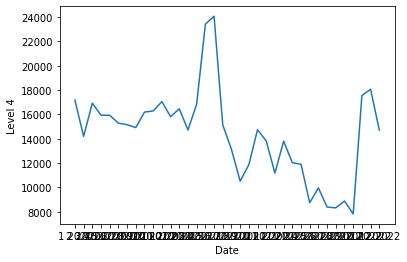

In [75]:
sns.lineplot(x = df_new['Date'], y = df_new['Level 4'])

In [76]:
df_new.index = df_new['Date']

In [77]:
df_new

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n,Date
Date,,,,,,,,,,,,,
1 2020,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566,1,1 2020
2 2020,2020,February,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47265,14196,98.188986,2,2 2020
3 2020,2020,March,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53760,16925,97.840842,3,3 2020
4 2020,2020,April,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,47204,15942,97.966245,4,4 2020
5 2020,2020,May,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,48114,15928,97.968031,5,5 2020
6 2020,2020,June,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,44218,15285,98.050060,6,6 2020
7 2020,2020,July,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,46498,15157,98.066389,7,7 2020
8 2020,2020,August,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53320,14920,98.096624,8,8 2020
9 2020,2020,September,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,64347,16193,97.934224,9,9 2020


In [78]:
df_new.tail()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n,Date
Date,,,,,,,,,,,,,
8 2022,2022,August,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,24911,8888,98.866139,8,8 2022
9 2022,2022,September,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,22206,7828,99.001365,9,9 2022
10 2022,2022,October,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,49823,17548,97.761364,10,10 2022
11 2022,2022,November,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,53050,18070,97.694771,11,11 2022
12 2022,2022,December,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,45478,14718,98.122393,12,12 2022


In [79]:
df_ts = df_new.loc[:, ['Date', 'Level 4']]

In [80]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'], format='%m %Y')
df_ts = df_ts.set_index('Date')
df_ts.head()

,Level 4
Date,
2020-01-01,17178
2020-02-01,14196
2020-03-01,16925
2020-04-01,15942
2020-05-01,15928


In [81]:
# y_hat_sma = df_ts.copy()
# ma_window = 12
# y_hat_sma['level4_forecast'] = df_ts['Level 4'].rolling(ma_window).mean()

In [82]:
# date_ind = y_hat_sma.tail(12).index
# date_ind

In [83]:
# y_hat_sma.shape

In [84]:
for i in range(1, 13):
  mean_val = df_ts['Level 4'].rolling(12).mean().iloc[-1]
  print(mean_val)
  if len(str(i)) == 1:
    next_ind = "2023-0"+str(i)+"-01"
  else:
    next_ind = "2023-"+str(i)+"-01"
  df_ts.loc[next_ind, 'Level 4'] = mean_val

df_ts.tail(15)

11686.25
11509.4375
11465.640625
11429.194010416666
11652.04351128472
11792.797137225114
12076.446898660543
12388.650806882253
12680.371707455774
13084.736016410423
12712.797351111292
12266.363797037231


,Level 4
Date,
2022-10-01,17548.000000
2022-11-01,18070.000000
2022-12-01,14718.000000
2023-01-01,11686.250000
2023-02-01,11509.437500
2023-03-01,11465.640625
2023-04-01,11429.194010
2023-05-01,11652.043511
2023-06-01,11792.797137


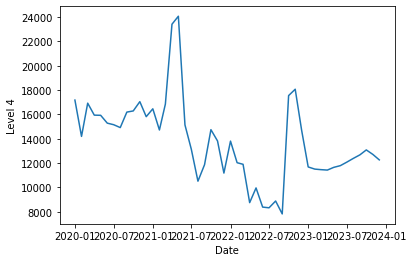

In [85]:
sns.lineplot(x = df_ts.index, y = df_ts['Level 4'])

In [86]:
data.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566,1
1,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850,1
2,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319,1
3,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974,1
4,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472,1


In [87]:
def next_date(year, x):
  next = []
  cnt = 0
  while (x < 12):
    # next.append(str(x + 1) + ' ' + str(year))
    if (x + 1) < 10:
      next.append(str(year) + '-0' + str(x + 1) + '-01')
    else:
      next.append(str(year) + '-' + str(x + 1) + '-01')
    x += 1
    cnt += 1

  if  cnt < 12:
    x = 1
    year = year + 1
  while (cnt < 12):
    if (x < 10):
      next.append(str(year) + '-0' + str(x) + '-01') 
    else:
      next.append(str(year) + '-' + str(x) + '-01')
    x += 1
    cnt += 1
  return next

In [88]:
next_date(2020, 5)

['2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01',
 '2020-10-01',
 '2020-11-01',
 '2020-12-01',
 '2021-01-01',
 '2021-02-01',
 '2021-03-01',
 '2021-04-01',
 '2021-05-01']

In [89]:
def predict_future(year = 2021, month = 'December', laptop_Desktop = 'Desktop_Website', Type_of_Customers = 'Existing_Customer', Coming_from = 'From_LinkedIn', Place_in_India = 'Bengaluru'):
  x = month_num[month]
  df_new = data[(data['Laptop/Desktop'] == laptop_Desktop) & (data['Type_of_Customers?'] == Type_of_Customers) & (data['Coming from'] == Coming_from) & (data['Place_in_India'] == Place_in_India)]
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
  
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')
  filter_date = str(year) + '-' + str(x) + '-01'
  df_ts = df_new[df_new['Date'] <= filter_date]
  df_ts = df_ts.set_index('Date')
  df_new = df_new.set_index('Date')
  
  next = next_date(year, x)
  
  df_ts['Level 4 Predicted'] = df_ts['Level 4']
  
  for i in range(len(next)):
    mean_val = df_ts['Level 4 Predicted'].rolling(12).mean().iloc[-1]
    df_ts.loc[next[i], 'Level 4 Predicted'] = mean_val

  # print(df_ts.tail(15)

  return df_ts, df_new, next

In [90]:
# true_value = df_new.loc[next, 'Level 4']
  # predicted_value = df_ts.loc[next, 'Level 4 Predicted']
  # print(true_value, predicted_value) 

  # from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
  # print("Mean absolute percentage error : ",mean_absolute_percentage_error(true_value, predicted_value))
  # print("Mean squared error", mean_squared_error(true_value, predicted_value))

  # sns.lineplot(x = next, y = predicted_value)
  # plt.xticks(rotation = 90)

<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


Date
2022-01-01    13808
2022-02-01    12035
2022-03-01    11903
2022-04-01     8755
2022-05-01     9963
2022-06-01     8389
2022-07-01     8330
2022-08-01     8888
2022-09-01     7828
2022-10-01    17548
2022-11-01    18070
2022-12-01    14718
Name: Level 4, dtype: int64 Date
2022-01-01    15493.833333
2022-02-01    15413.069444
2022-03-01    15470.575231
2022-04-01    15355.539834
2022-05-01    14684.251487
2022-06-01    13902.439111
2022-07-01    13799.309037
2022-08-01    13855.001456
2022-09-01    14133.168245
2022-10-01    14321.765598
2022-11-01    14286.162731
2022-12-01    14324.842959
Name: Level 4 Predicted, dtype: float64
Mean absolute percentage error :  0.41903055430517555
Mean squared error 20204709.126211926


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

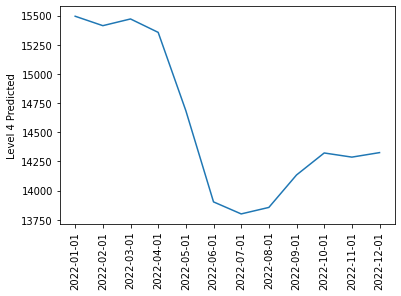

In [91]:
y_predicted = predict_future()
true_value = y_predicted[1].loc[y_predicted[2], 'Level 4']
predicted_value = y_predicted[0].loc[y_predicted[2], 'Level 4 Predicted']
print(true_value, predicted_value) 

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
print("Mean absolute percentage error : ",mean_absolute_percentage_error(true_value, predicted_value))
print("Mean squared error", mean_squared_error(true_value, predicted_value))

sns.lineplot(x = y_predicted[2], y = predicted_value)
plt.xticks(rotation = 90)

In [92]:
# true_value = df_new.loc[next, 'Level 4']
# predicted_value = df_ts.loc[next, 'Level 4 Predicted']
# print(true_value, predicted_value) 

# from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
# print("Mean absolute percentage error : ",mean_absolute_percentage_error(true_value, predicted_value))
# print("Mean squared error", mean_squared_error(true_value, predicted_value))

# sns.lineplot(x = next, y = predicted_value)
# plt.xticks(rotation = 90)

In [93]:
y_predicted_2021 = predict_future(2020, 'December')
true_value = y_predicted_2021[1].loc[y_predicted_2021[2], 'Level 4']
predicted_value = y_predicted_2021[0].loc[y_predicted_2021[2], 'Level 4 Predicted']

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
print("Mean absolute percentage error : ",mean_absolute_percentage_error(true_value, predicted_value))
print("Mean squared error", mean_squared_error(true_value, predicted_value))

Mean absolute percentage error :  0.2177493524938224
Mean squared error 17538839.836275056


<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [94]:
y_predicted_2021 = predict_future(2021, 'December')
true_value = y_predicted_2021[1].loc[y_predicted_2021[2], 'Level 4']
predicted_value = y_predicted_2021[0].loc[y_predicted_2021[2], 'Level 4 Predicted']

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
print("Mean absolute percentage error : ",mean_absolute_percentage_error(true_value, predicted_value))
print("Mean squared error", mean_squared_error(true_value, predicted_value))

Mean absolute percentage error :  0.41903055430517555
Mean squared error 20204709.126211926


<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [95]:
y_predicted_3 = predict_future(2022, 'December')
true_value = y_predicted_2021[1].loc[y_predicted_2021[2], 'Level 4']
predicted_value = y_predicted_2021[0].loc[y_predicted_2021[2], 'Level 4 Predicted']

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
print("Mean absolute percentage error : ",mean_absolute_percentage_error(true_value, predicted_value))
print("Mean squared error", mean_squared_error(true_value, predicted_value))

Mean absolute percentage error :  0.41903055430517555
Mean squared error 20204709.126211926


<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [96]:
df_new = y_predicted_3[1]
df1 = df_new['Level 4'].reset_index()
df1['target'] = 0
df1.head()

,Date,Level 4,target
0,2020-01-01,17178,0
1,2020-02-01,14196,0
2,2020-03-01,16925,0
3,2020-04-01,15942,0
4,2020-05-01,15928,0


In [97]:
df2 = y_predicted_3[0].loc[y_predicted_3[2], 'Level 4 Predicted'].reset_index()
df2['target'] = 1
df2.rename(columns = {'Level 4 Predicted' : 'Level 4'}, inplace = True)
df2.head()

,Date,Level 4,target
0,2023-01-01,11686.250000,1
1,2023-02-01,11509.437500,1
2,2023-03-01,11465.640625,1
3,2023-04-01,11429.194010,1
4,2023-05-01,11652.043511,1


In [98]:
df_final = pd.concat([df1, df2])
df_final = df_final.reset_index()
df_final.head()

,index,Date,Level 4,target
0,0,2020-01-01,17178.0,0
1,1,2020-02-01,14196.0,0
2,2,2020-03-01,16925.0,0
3,3,2020-04-01,15942.0,0
4,4,2020-05-01,15928.0,0


In [99]:
df_final['Date'].value_counts()

2020-01-01    1
2020-02-01    1
2022-03-01    1
2022-04-01    1
2022-05-01    1
2022-06-01    1
2022-07-01    1
2022-08-01    1
2022-09-01    1
2022-10-01    1
2022-11-01    1
2022-12-01    1
2023-01-01    1
2023-02-01    1
2023-03-01    1
2023-04-01    1
2023-05-01    1
2023-06-01    1
2023-07-01    1
2023-08-01    1
2023-09-01    1
2023-10-01    1
2023-11-01    1
2022-02-01    1
2022-01-01    1
2021-12-01    1
2020-12-01    1
2020-03-01    1
2020-04-01    1
2020-05-01    1
2020-06-01    1
2020-07-01    1
2020-08-01    1
2020-09-01    1
2020-10-01    1
2020-11-01    1
2021-01-01    1
2021-11-01    1
2021-02-01    1
2021-03-01    1
2021-04-01    1
2021-05-01    1
2021-06-01    1
2021-07-01    1
2021-08-01    1
2021-09-01    1
2021-10-01    1
2023-12-01    1
Name: Date, dtype: int64

(array([737425., 737607., 737791., 737972., 738156., 738337., 738521.,
        738702., 738886.]), <a list of 9 Text major ticklabel objects>)

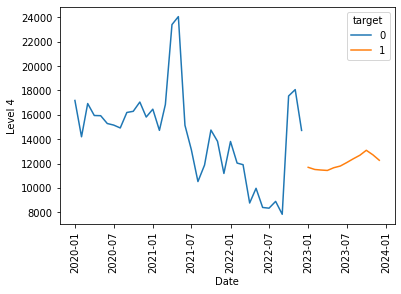

In [100]:
sns.lineplot(x = df_final['Date'], y = df_final['Level 4'], hue = df_final['target'])
plt.xticks(rotation = 90)

In [101]:
df_final.head(2)

,index,Date,Level 4,target
0,0,2020-01-01,17178.0,0
1,1,2020-02-01,14196.0,0


In [102]:
data['Place_in_India'].value_counts()

Bengaluru    432
Hyderabad    432
Dehradun     432
Indore       432
Pune         432
Name: Place_in_India, dtype: int64

In [103]:
d = dict()

In [104]:
y_predicted_2023_Pune = predict_future(Place_in_India = 'Pune')[0]['Level 4 Predicted'].sum()

<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [105]:
y_predicted_2023_Pune

1197972.0077809847

In [106]:
d['Pune'] = y_predicted_2023_Pune

In [107]:
d['Bengaluru'] = predict_future(Place_in_India = 'Bengaluru')[0]['Level 4 Predicted'].sum()

<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [108]:
d['Hyderabad'] = predict_future(Place_in_India = 'Hyderabad')[0]['Level 4 Predicted'].sum()

<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [109]:
d['Dehradun'] = predict_future(Place_in_India = 'Dehradun')[0]['Level 4 Predicted'].sum()

<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [110]:
d['Indore'] = predict_future(Place_in_India = 'Indore')[0]['Level 4 Predicted'].sum()

<ipython-input-89-5c9342d9a370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Month_n'].astype('str') + ' ' + df_new['Year'].astype('str')
<ipython-input-89-5c9342d9a370>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m %Y')


In [111]:
d

{'Pune': 1197972.0077809847,
 'Bengaluru': 551842.9584677003,
 'Hyderabad': 1399812.3773233967,
 'Dehradun': 575617.4265689981,
 'Indore': 2316050.186538355}

In [112]:
city = pd.DataFrame(list(d.items()), columns = ['Place_in_India', '2023'])


In [113]:
city

,Place_in_India,2023
0,Pune,1.197972e+06
1,Bengaluru,5.518430e+05
2,Hyderabad,1.399812e+06
3,Dehradun,5.756174e+05
4,Indore,2.316050e+06


In [114]:
city_2 = data.groupby('Place_in_India')['Level 4'].sum()

In [115]:
city_2.reset_index()

,Place_in_India,Level 4
0,Bengaluru,10124260
1,Dehradun,8804705
2,Hyderabad,21204313
3,Indore,52730177
4,Pune,35054534


In [116]:
ans = city.merge(city_2, on = 'Place_in_India')

In [117]:
ans['Ratio'] = ans['2023'] / ans['Level 4']

In [118]:

ans

,Place_in_India,2023,Level 4,Ratio
0,Pune,1.197972e+06,35054534,0.034175
1,Bengaluru,5.518430e+05,10124260,0.054507
2,Hyderabad,1.399812e+06,21204313,0.066015
3,Dehradun,5.756174e+05,8804705,0.065376
4,Indore,2.316050e+06,52730177,0.043923


In [119]:
ans[ans['Ratio'] > 1]

,Place_in_India,2023,Level 4,Ratio


In [120]:
# Part - 5

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data.head(10)

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566,1
1,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850,1
2,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319,1
3,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974,1
4,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472,1
5,2020,January,Desktop_Website,Existing_Customer,Direct_traffic,Bengaluru,783870.222017,358215.416281,90241,24229,96.909055,1
6,2020,January,Desktop_Website,Existing_Customer,Direct_traffic,Hyderabad,783870.222017,358215.416281,77630,18502,97.639660,1
7,2020,January,Desktop_Website,Existing_Customer,Direct_traffic,Dehradun,783870.222017,358215.416281,91479,24363,96.891960,1
8,2020,January,Desktop_Website,Existing_Customer,Direct_traffic,Indore,783870.222017,358215.416281,436641,165036,78.946005,1
9,2020,January,Desktop_Website,Existing_Customer,Direct_traffic,Pune,783870.222017,358215.416281,531446,101317,87.074774,1


In [123]:
new_data = data[(data['Year'] == 2020) | (data['Year'] == 2021)]

In [124]:
new_data["Date"] = new_data['Year'].astype('str') + ' ' +  new_data['Month'] 

<ipython-input-124-9ab5df1ae1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Date"] = new_data['Year'].astype('str') + ' ' +  new_data['Month']


In [125]:
new_data

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n,Date
0,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566,1,2020 January
1,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850,1,2020 January
2,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319,1,2020 January
3,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974,1,2020 January
4,2020,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472,1,2020 January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2021,December,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,66917.000000,23132.000000,6618,2368,96.461288,12,2021 December
1436,2021,December,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,117097.000000,58525.000000,24731,8278,92.930647,12,2021 December
1437,2021,December,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,46111.000000,25422.000000,5697,1619,96.488907,12,2021 December
1438,2021,December,Laptop_Website,New_Customer,Unidentified_Sources,Indore,466715.000000,207872.000000,107705,30563,93.451464,12,2021 December


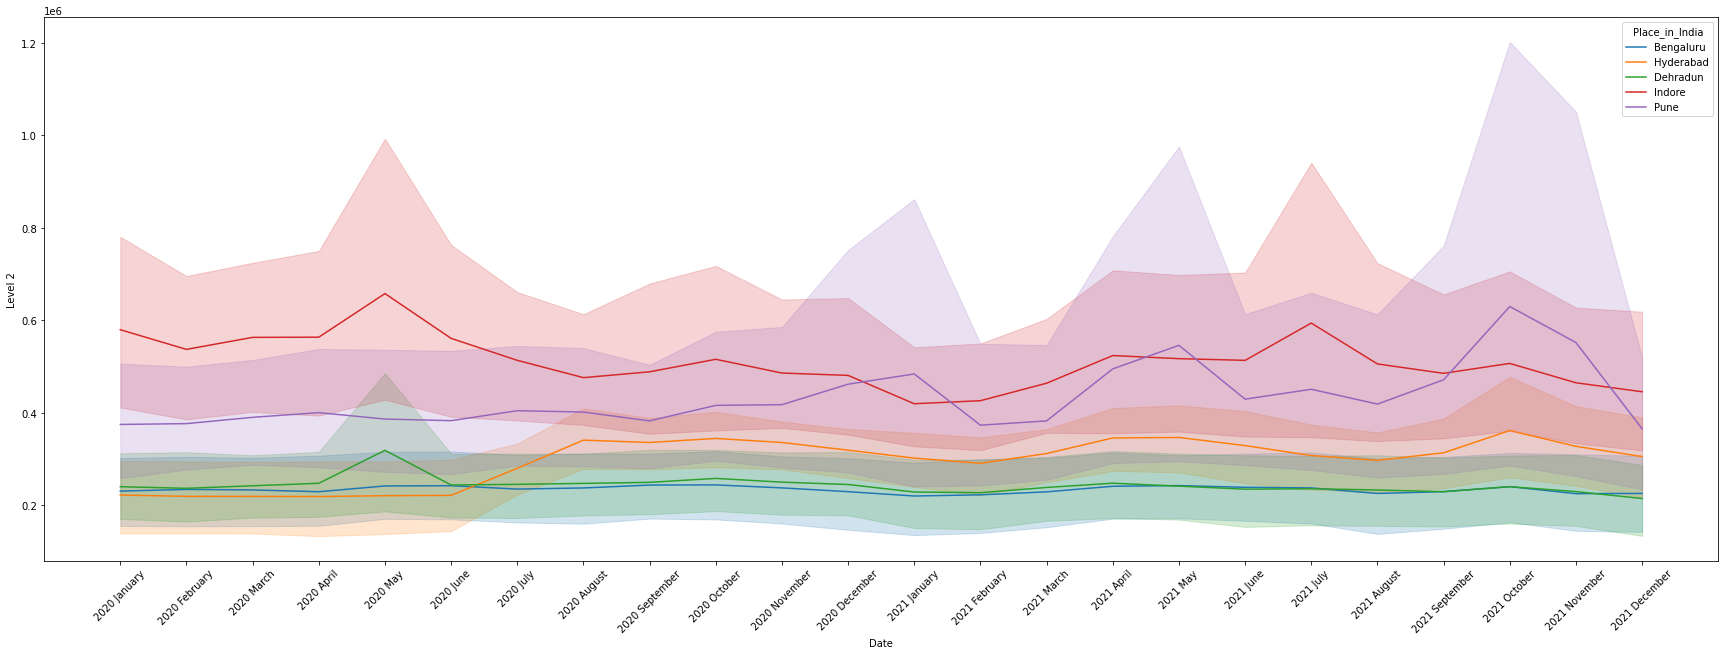

In [126]:
plt.figure(figsize = (30, 10))
sns.lineplot(x = new_data['Date'], y = new_data['Level 2'], hue = new_data['Place_in_India'])
plt.xticks(rotation=45)
plt.show()

In [127]:
# new_data.groupby(['Date', ''])['Level 1'].sum()

In [128]:
DataF = new_data.groupby(['Date', 'Laptop/Desktop'])['Level 1'].sum().reset_index()

In [129]:
DataF.head()

,Date,Laptop/Desktop,Level 1
0,2020 April,Desktop_Website,1.917781e+07
1,2020 April,Laptop_Website,2.001406e+07
2,2020 August,Desktop_Website,1.850568e+07
3,2020 August,Laptop_Website,2.032523e+07
4,2020 December,Desktop_Website,2.064191e+07


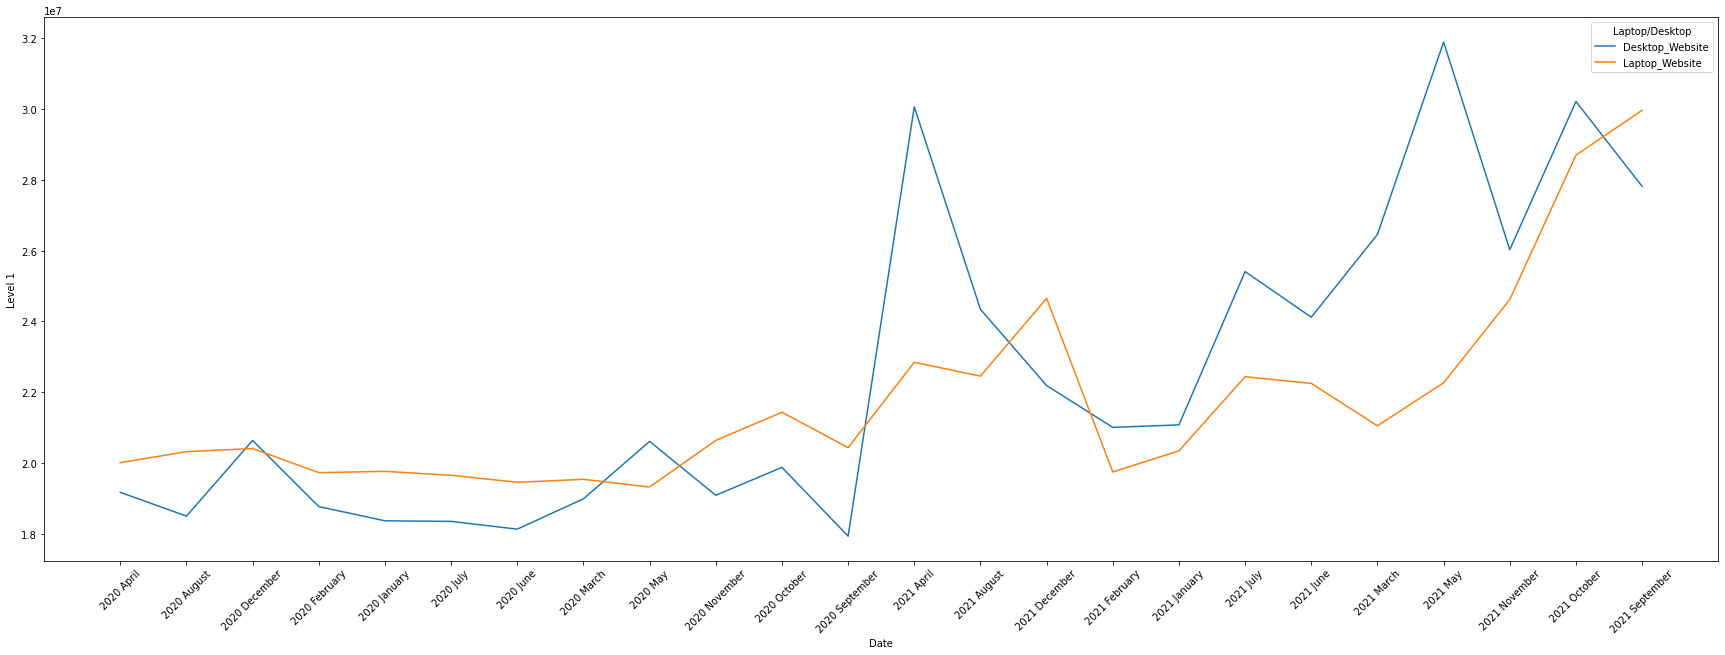

In [130]:
plt.figure(figsize = (30, 10))
sns.lineplot(x = DataF['Date'], y = DataF['Level 1'], hue = DataF['Laptop/Desktop'])
plt.xticks(rotation = 45)
plt.show()

In [131]:
new_data_2 = data[(data['Year'] == 2022) | (data['Year'] == 2021)]

In [132]:
new_data_2['Date'] = new_data_2['Month'] + ' ' + new_data_2['Year'].astype('str')

<ipython-input-132-51192a57e5dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_2['Date'] = new_data_2['Month'] + ' ' + new_data_2['Year'].astype('str')


In [133]:
new_data_2

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage,Month_n,Date
720,2021,January,Desktop_Website,Existing_Customer,From_LinkedIn,Bengaluru,783870.222017,358215.416281,51753,16463,97.899780,1,January 2021
721,2021,January,Desktop_Website,Existing_Customer,From_LinkedIn,Hyderabad,783870.222017,358215.416281,112924,46185,94.108081,1,January 2021
722,2021,January,Desktop_Website,Existing_Customer,From_LinkedIn,Dehradun,783870.222017,358215.416281,44096,17047,97.825278,1,January 2021
723,2021,January,Desktop_Website,Existing_Customer,From_LinkedIn,Indore,783870.222017,358215.416281,134562,55143,92.965290,1,January 2021
724,2021,January,Desktop_Website,Existing_Customer,From_LinkedIn,Pune,783870.222017,358215.416281,189015,30749,96.077284,1,January 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882,97.203525,12,December 2022
2156,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703,96.118235,12,December 2022
2157,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089,95.711617,12,December 2022
2158,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465,86.768597,12,December 2022


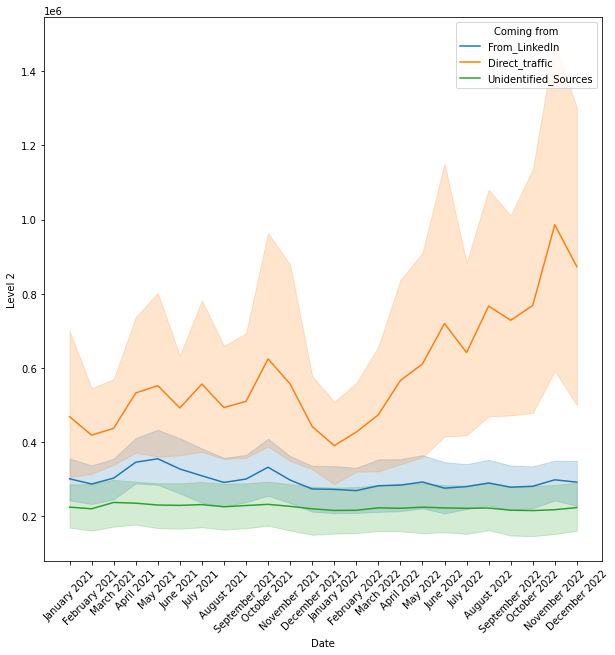

In [134]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = new_data_2['Date'], y = new_data_2['Level 2'], hue = new_data_2['Coming from'])
plt.xticks(rotation = 45)
plt.show()

In [135]:
new_data_3 = data[(data['Year'] == 2020) | (data['Year'] == 2021) | (data['Year'] == 2022)]

In [136]:
new_data_3['Date'] = new_data_3['Month'] + ' ' + new_data_3['Year'].astype('str')

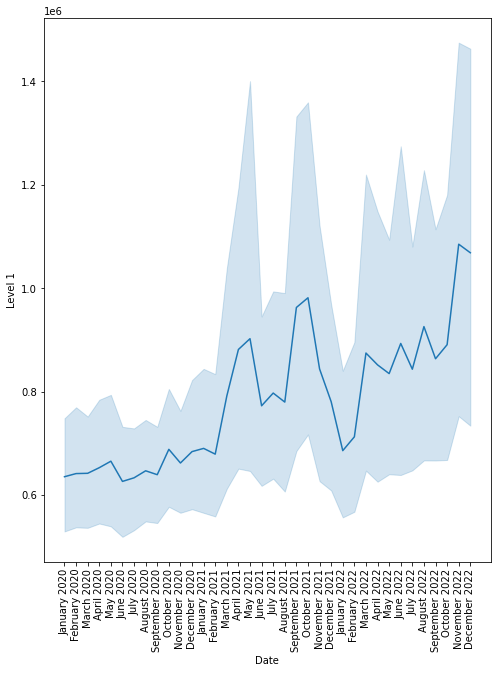

In [137]:
plt.figure(figsize = (8 ,10))
sns.lineplot(x = new_data_3['Date'], y = new_data_3['Level 1'])
plt.xticks(rotation = 90)
plt.show()

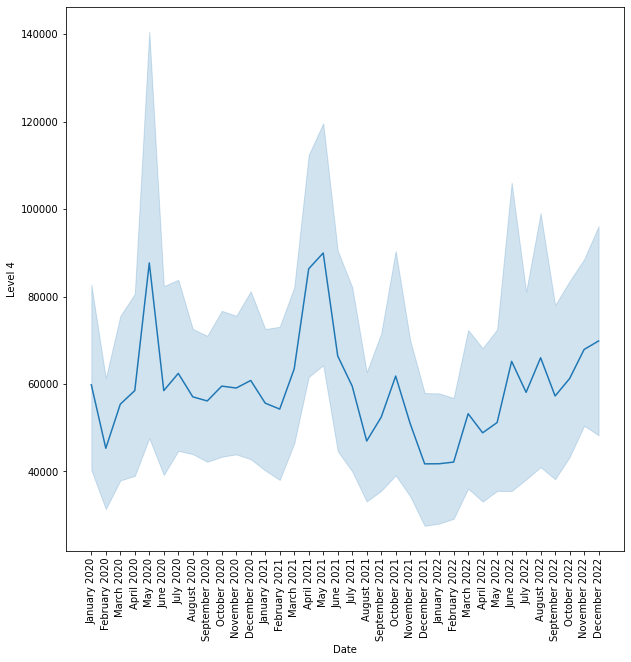

In [138]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = new_data_3['Date'], y = new_data_3['Level 4'])
plt.xticks(rotation = 90)
plt.show()

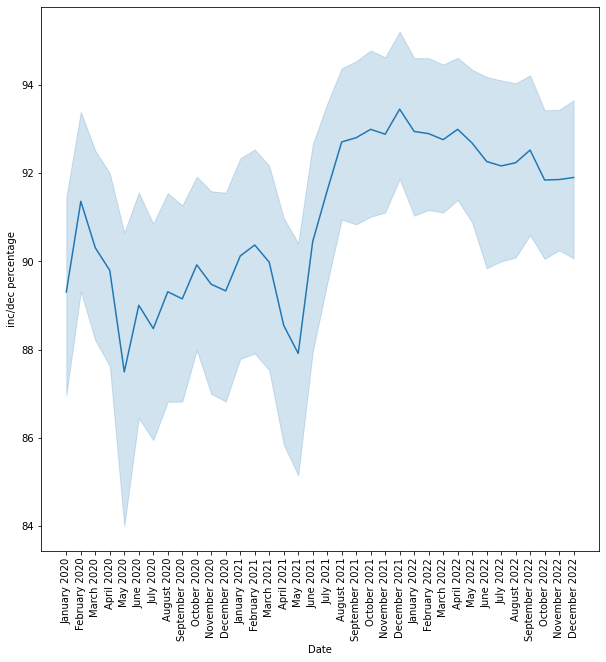

In [139]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = new_data_3['Date'], y = new_data_3['inc/dec percentage'])
plt.xticks(rotation = 90)
plt.show()

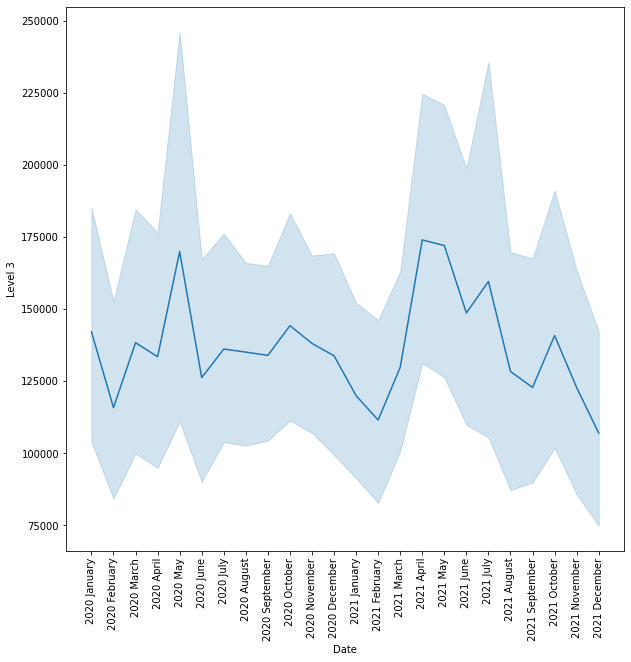

In [140]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = new_data['Date'], y = new_data['Level 3'])
plt.xticks(rotation = 90)
plt.show()

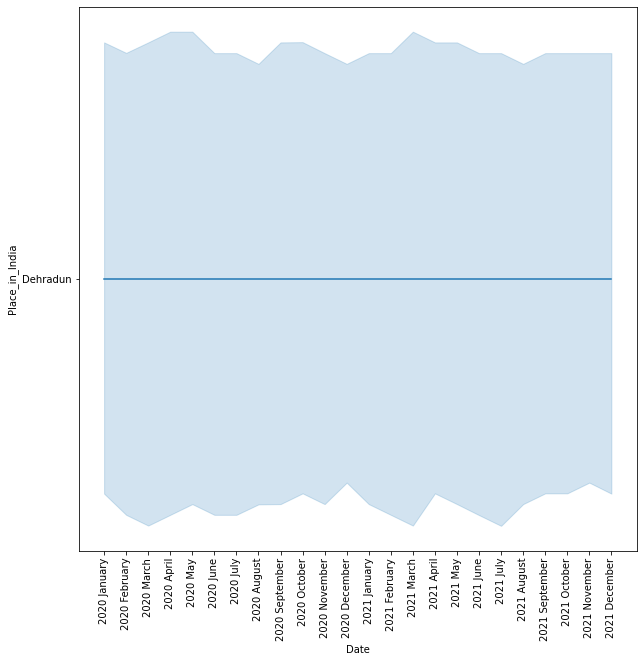

In [141]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = new_data['Date'], y = new_data['Place_in_India'])
plt.xticks(rotation = 90)
plt.show()

In [142]:
new_data_4 = data[data['Year'] == 2022]

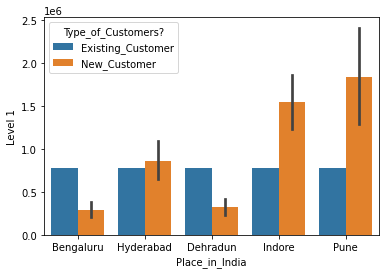

In [143]:
sns.barplot(x = new_data_4['Place_in_India'], y = new_data_4['Level 1'], hue = data['Type_of_Customers?'])